In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../results/sampling_no_searching_kdn'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [4]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score', 'test score global', 'performance gap', 'complexity class difference'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        summary.loc[i, 'threshold'] = exp_summary[model]['threshold']
        summary.loc[i, 'sample'] = exp_summary[model]['sample_proportion']
        summary.loc[i, 'test score'] = exp_summary[model]['test_score']
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['test score']

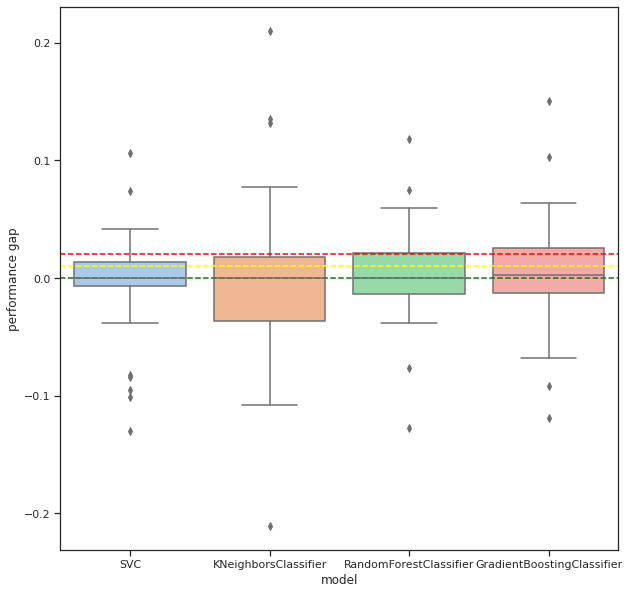

In [5]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='green')
plt.axhline(0.01, ls='--', c='yellow')
plt.axhline(0.02, ls='--', c='red')
plt.show()

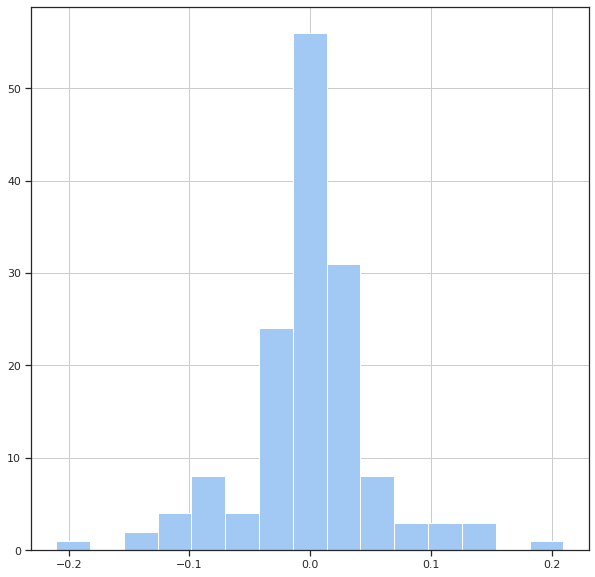

In [6]:
ax = summary['performance gap'].hist(bins=15)
figure = ax.get_figure()
figure;

In [7]:
figure.savefig('../images/hist_performance_no_searching_kdn.png');

In [8]:
summary['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)]).round(2)

count    148.00
mean      -0.00
std        0.05
min       -0.21
10%       -0.07
20%       -0.03
30%       -0.01
40%       -0.00
50%        0.00
60%        0.01
70%        0.01
80%        0.03
90%        0.05
max        0.21
Name: performance gap, dtype: float64

In [9]:
summary['sample'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)]).round(2)

count    148.00
mean       0.58
std        0.33
min        0.00
10%        0.11
20%        0.15
30%        0.28
40%        0.58
50%        0.64
60%        0.75
70%        0.83
80%        0.92
90%        0.97
max        1.00
Name: sample, dtype: float64

In [10]:
summary['threshold'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)]).round(2)

count    148.00
mean       0.51
std        0.23
min        0.20
10%        0.20
20%        0.20
30%        0.40
40%        0.40
50%        0.50
60%        0.60
70%        0.78
80%        0.80
90%        0.80
max        0.80
Name: threshold, dtype: float64

In [11]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]), '\n')

SVC
count    37.000000
mean     -0.005092
std       0.045629
min      -0.130437
0%       -0.130437
10%      -0.083348
20%      -0.017579
30%      -0.005920
40%      -0.002674
50%       0.000000
60%       0.002840
70%       0.011150
80%       0.019715
90%       0.033339
max       0.106540
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.000000
mean     -0.006890
std       0.072368
min      -0.210442
0%       -0.210442
10%      -0.083672
20%      -0.058807
30%      -0.027288
40%      -0.017349
50%       0.000000
60%       0.002251
70%       0.013552
80%       0.020061
90%       0.055627
max       0.209609
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.002384
std       0.041820
min      -0.127460
0%       -0.127460
10%      -0.036023
20%      -0.021807
30%      -0.009383
40%      -0.003067
50%       0.000000
60%       0.007290
70%       0.015083
80%       0.027256
90%       0.047905
max       0.117878
Name: performance

In [12]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['sample'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.576757
std       0.327906
min       0.000000
25%       0.190000
50%       0.640000
75%       0.830000
max       1.000000
Name: sample, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.556486
std       0.324630
min       0.000000
25%       0.170000
50%       0.620000
75%       0.780000
max       1.000000
Name: sample, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.608108
std       0.349482
min       0.000000
25%       0.180000
50%       0.640000
75%       0.930000
max       1.000000
Name: sample, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.572703
std       0.338179
min       0.000000
25%       0.180000
50%       0.640000
75%       0.900000
max       1.000000
Name: sample, dtype: float64 



In [13]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['threshold'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.524324
std       0.255392
min       0.200000
25%       0.200000
50%       0.600000
75%       0.800000
max       0.800000
Name: threshold, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.459459
std       0.239745
min       0.200000
25%       0.200000
50%       0.400000
75%       0.600000
max       0.800000
Name: threshold, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.578378
std       0.225013
min       0.200000
25%       0.400000
50%       0.600000
75%       0.800000
max       0.800000
Name: threshold, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.475676
std       0.207372
min       0.200000
25%       0.400000
50%       0.400000
75%       0.600000
max       0.800000
Name: threshold, dtype: float64 



In [14]:
import scipy.stats as st

In [15]:
st.spearmanr(summary['test score'], summary['test score global'])[0]

0.9335053981571397